In [5]:
import pandas as pd

%matplotlib inline

# Predicting Video Game Global Sales from Critic Scores

In order to get a better spread of Video Game Sales to Critic Scores I have removed the top 50 best selling Games and the last 200 worst selling games.

In [22]:
df_vg = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', index_col='Name')
df_vg.head()

Platform  Year_of_Release         Genre Publisher  \
Name                                                                         
Wii Sports                    Wii           2006.0        Sports  Nintendo   
Super Mario Bros.             NES           1985.0      Platform  Nintendo   
Mario Kart Wii                Wii           2008.0        Racing  Nintendo   
Wii Sports Resort             Wii           2009.0        Sports  Nintendo   
Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

                          NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Name                                                                  
Wii Sports                   41.36     28.96      3.77         8.45   
Super Mario Bros.            29.08      3.58      6.81         0.77   
Mario Kart Wii               15.68     12.76      3.79         3.29   
Wii Sports Resort            15.61     10.93      3.28         2.95   
Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

                          Global_Sales  Critic_Score  Critic_Count User_Score  \
Name                                                                            
Wii Sports                       82.53          76.0          51.0          8   
Super Mario Bros.                40.24           NaN           NaN        NaN   
Mario Kart Wii                   35.52          82.0          73.0        8.3   
Wii Sports Resort                32.77          80.0          73.0          8   
Pokemon Red/Pokemon Blue         31.37           NaN           NaN        NaN   

                          User_Count Developer Rating  
Name                                                   
Wii Sports                     322.0  Nintendo      E  
Super Mario Bros.                NaN       NaN    NaN  
Mario Kart Wii                 709.0  Nintendo      E  
Wii Sports Resort              192.0  Nintendo      E  
Pokemon Red/Pokemon Blue         NaN       NaN    NaN

In [12]:
df_vg.head()
df_vg['Global_Sales'] =df_vg['Global_Sales'].apply(lambda x: x*10)
#df_vg['User_Score'] =df_vg['User_Score'].apply(lambda x: x*10)

In [13]:
df_videoGames = df_vg[['Global_Sales', 'Critic_Score']].dropna()
df_videoGames = df_videoGames.iloc[50:200]
df_videoGames.head(20)

Global_Sales  Critic_Score
Name                                                              
The Elder Scrolls V: Skyrim                   8790.0          96.0
FIFA 16                                       8570.0          82.0
Halo 2                                        8490.0          95.0
Wii Party                                     8380.0          68.0
Mario Party 8                                 8270.0          62.0
FIFA Soccer 13                                8160.0          88.0
Final Fantasy X                               8050.0          92.0
The Sims 3                                    8010.0          86.0
Final Fantasy VIII                            7860.0          90.0
Pokémon Platinum Version                      7720.0          83.0
Grand Theft Auto: Liberty City Stories        7690.0          88.0
Call of Duty: Advanced Warfare                7660.0          83.0
FIFA 17                                       7590.0          85.0
Super Mario Galaxy 2                          7510.0          97.0
Call of Duty: World at War                    7380.0          84.0
Battlefield 3                                 7320.0          84.0
Need for Speed Underground                    7200.0          85.0
Just Dance                                    7200.0          49.0
Battlefield 3                                 7170.0          85.0
Fallout 4                                     7160.0          87.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199D45AF288>,
      dtype=object)

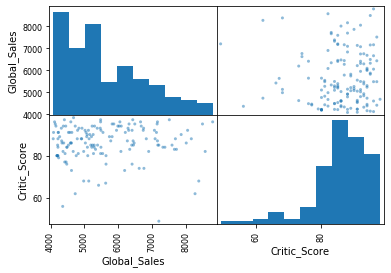

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_videoGames)

### From our scatter plot we can see this correlation is NOT  linearly related

This means a linear regression will not work!

In [18]:
X = df_videoGames[['Critic_Score']]
Y = df_videoGames[['Global_Sales']]




In [19]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()

model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.predict([[50.0]])

array([[5560.48256248]])

## These Predictions cannot be trusted!

# Instead Let's try to see if we can predict what Genre a video game is based on it's sales in different regions!

In [78]:
df_vgA = df_vg[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Genre' ] ].dropna()
df_h = df_vgA.reset_index(drop=True)
#df_vgA.head()

In [79]:
df_h['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### We can see our different genres above!

In [80]:
X= df_h.iloc[:, :4]
y = df_h[['Genre']]

In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

display(y.head())

Genre
0     10
1      4
2      6
3     10
4      7

After applying a transform on the Genres we can now use them to generate our tests and trains!

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### We can now see the predicted results, which show a lot of Sport games

In [84]:
perdictions = model.predict(X_test)

perdictions

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, perdictions))

[[667   0   0   0   0   0   0  11   3   0   0   0]
 [250   0   0   0   0   0   0   7   0   0   0   0]
 [138   0   0   0   1   0   0  17   0   0   0   0]
 [319   0   0   0   0   0   0  14   1   0   1   0]
 [183   0   0   0   4   0   0  11   1   0   0   0]
 [109   0   0   0   0   0   0   8   0   0   0   0]
 [239   0   0   0   3   0   0   4   1   0   0   0]
 [237   0   0   0   0   0   0  41   3   0   0   0]
 [246   0   0   0   1   0   0   6   8   0   0   0]
 [177   0   0   0   0   0   0  11   1   0   0   0]
 [480   0   0   0   1   0   0  11   2   0   0   0]
 [119   0   0   0   1   0   0   7   0   0   0   0]]


In [86]:
display(df_h['Genre'].unique())

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

# Fianlly we can see how correct our model is!

Unfortunatly it tends to predict the genre as a Sport game, followed by it possibly being a Simulation game...

## This means again our model isn't very good

# Ultimatly this shows there is little/no correlation for which Video Game genres will sell the well in different regions